# Pet Finder - Machine Learning Project

*Antonia Zară and Doroteea Șandor, group 30433*

<img src="dog.jpg"/>


## About the project

Pet Finder is a project meant to aid the adoption process of different animals from shelters in Malaysia. We want to predict the adoptability of pets based on their traits such as: name, breed, color, whether or not they are vaccinated, sterilized or dewormed, and of course their location. If successful, the program will help rescuers around the country to improve the online profiles of the pets that need a home, thus increasing their chances of being adopted into a suitable and loving family.

The initial competition took place on Kaggle, which we used for description, hints, and data set. It can be found below:

<table align="left">
  <td>
    <a target="_blank" href="https://www.kaggle.com/c/petfinder-adoption-prediction"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

The data set represents examples of animals with the characteristics presented above and their adoption speed, which represents their adoptability. The lower the better for our little furry friends. Our missio is to determine as accurately as possible the adoption speed of a pet based on all the examples from the train set, in order to increase their chances of finding a happy family.

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [201]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading the data

In [202]:
import os
import pandas as pd

ROOT = r"C:\Users\Doroteea\Downloads\pet-finder-main\pet-finder-main"
DATA_PATH = os.path.join(ROOT,"data")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

def load_pet_data(train_path = TRAIN_PATH):
    csv_path = os.path.join(train_path, "train.csv")
    return pd.read_csv(csv_path)

def load_breed_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "breed_labels.csv")
    return pd.read_csv(csv_path)

def load_color_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "color_labels.csv")
    return pd.read_csv(csv_path)

def load_state_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "state_labels.csv")
    return pd.read_csv(csv_path)

def load_test_data(data_path = TEST_PATH):
    csv_path = os.path.join(data_path, "test.csv")
    return pd.read_csv(csv_path)

## Quick look at the data

In [203]:
pets = load_pet_data()
pets.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [204]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

**Let's examine a few types of breeds**

In [205]:
breeds = load_breed_data()
breeds.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


**Let's examine a few types of colors**

In [206]:
colors = load_color_data()
colors.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


**Let's examine a few types of states**

In [207]:
states = load_state_data()
states.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


**Merge all tables together for better readibility**

In [208]:
merged = pets.merge(breeds, left_on = 'Breed1', right_on = 'BreedID')
merged = merged.merge(breeds, left_on = 'Breed2', right_on = 'BreedID')

merged = merged.merge(colors, left_on = 'Color1', right_on = 'ColorID')
merged = merged.merge(colors, left_on = 'Color2', right_on = 'ColorID')
merged = merged.merge(colors, left_on = 'Color3', right_on = 'ColorID')

merged = merged.merge(states, left_on = 'State', right_on = 'StateID')

In [209]:
merged.head()

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Type,BreedName_y,ColorID_x,ColorName_x,ColorID_y,ColorName_y,ColorID,ColorName,StateID,StateName
0,2,Golden Tabby Girl,1,299,266,2,2,3,5,2,...,2,Domestic Short Hair,2,Brown,3,Golden,5,Cream,41326,Selangor
1,2,Ogen & Oyen,2,265,266,3,2,3,5,1,...,2,Domestic Short Hair,2,Brown,3,Golden,5,Cream,41326,Selangor
2,2,Money,1,266,265,2,2,3,5,1,...,2,Domestic Medium Hair,2,Brown,3,Golden,5,Cream,41326,Selangor
3,2,Noah And Nellie,2,299,299,3,2,3,5,1,...,2,Tabby,2,Brown,3,Golden,5,Cream,41326,Selangor
4,1,Karlo,2,307,307,1,2,3,5,2,...,1,Mixed Breed,2,Brown,3,Golden,5,Cream,41326,Selangor


**We look at the most and least popular breeds**

In [210]:
(pets.merge(breeds, left_on = 'Breed1', right_on = 'BreedID'))["BreedName"].value_counts()

Mixed Breed                   5927
Domestic Short Hair           3634
Domestic Medium Hair          1258
Tabby                          342
Domestic Long Hair             296
                              ... 
Pointer                          1
Staffordshire Bull Terrier       1
Irish Wolfhound                  1
Irish Terrier                    1
Dutch Shepherd                   1
Name: BreedName, Length: 175, dtype: int64

In [211]:
pets.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


**Histograms**

Saving figure attribute_histogram_plots


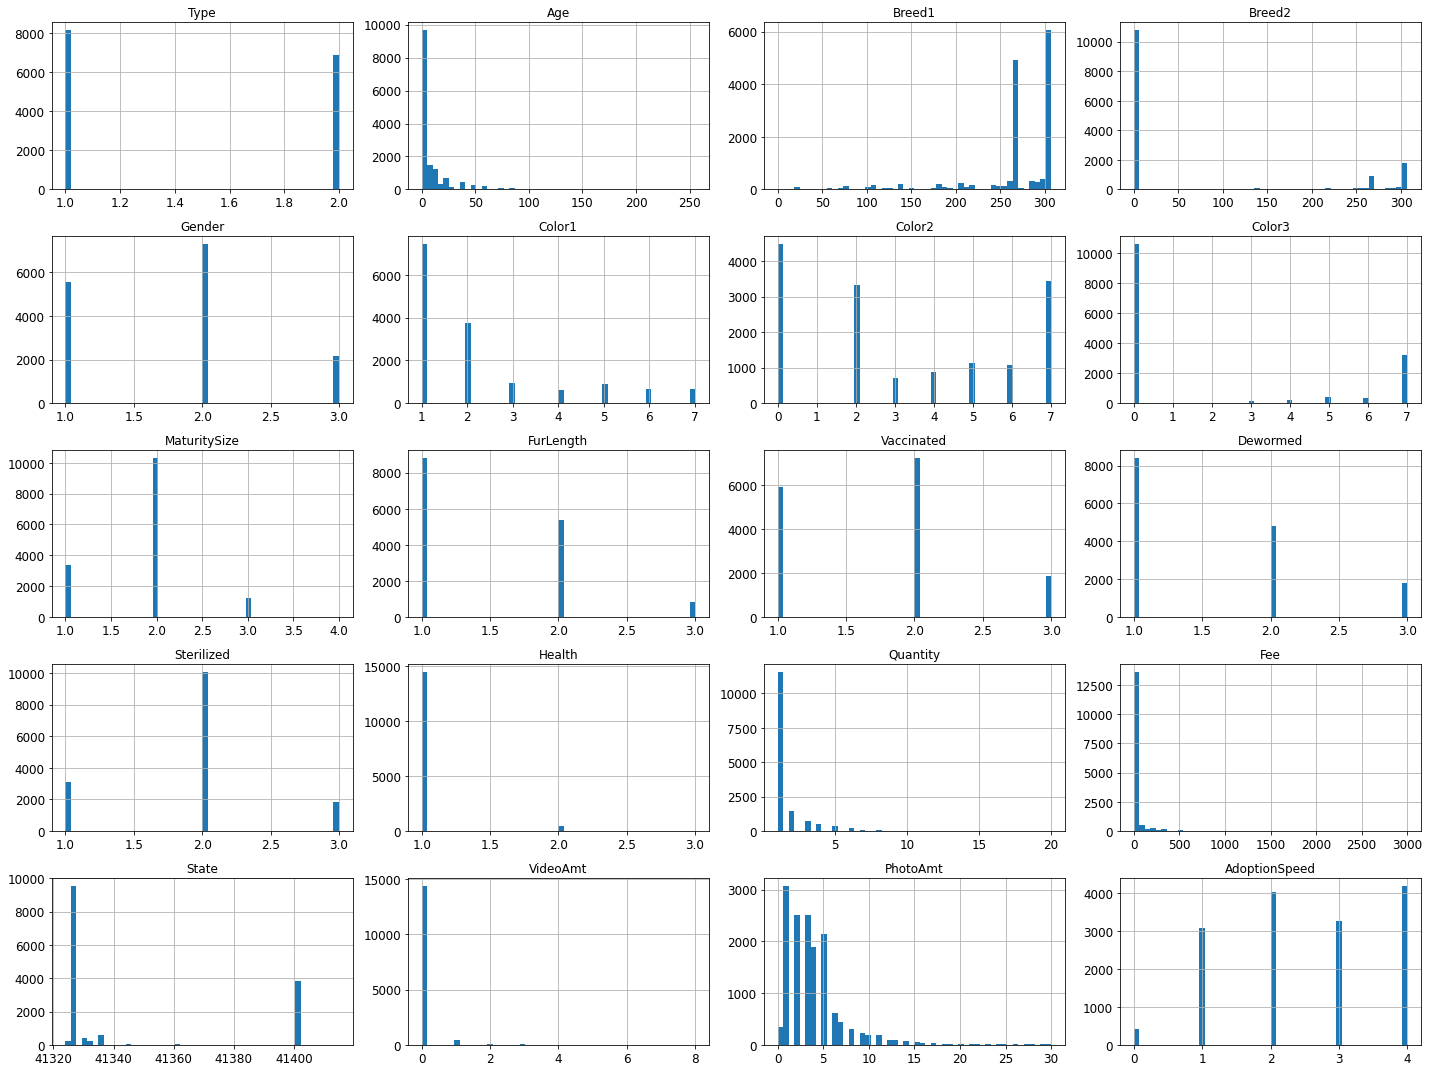

In [212]:
import matplotlib.pyplot as plt

pets.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Create Test Set

In [222]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(pets, pets["AdoptionSpeed"]):
    strat_train_set = pets.loc[train_index]
    strat_test_set = pets.loc[test_index]

In [223]:
strat_test_set["AdoptionSpeed"].value_counts() / len(strat_test_set)

4    0.280093
2    0.269090
3    0.217406
1    0.206069
0    0.027342
Name: AdoptionSpeed, dtype: float64

In [224]:
pets["AdoptionSpeed"].value_counts() / len(pets)

4    0.279931
2    0.269259
3    0.217368
1    0.206096
0    0.027346
Name: AdoptionSpeed, dtype: float64

In [225]:
from sklearn.model_selection import train_test_split
def adoption_speed_proportions(data):
    return data["AdoptionSpeed"].value_counts() / len(data)

train_set, test_set = train_test_split(pets, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": adoption_speed_proportions(pets),
    "Stratified": adoption_speed_proportions(strat_test_set),
    "Random": adoption_speed_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.027346,0.027342,0.030677,12.180158,-0.013338
1,0.206096,0.206069,0.209070,1.442779,-0.013338
2,0.269259,0.269090,0.268756,-0.186711,-0.062873
3,0.217368,0.217406,0.213738,-1.670067,0.017342
4,0.279931,0.280093,0.277759,-0.775685,0.058132


In [226]:
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop("AdoptionSpeed", axis=1, inplace=True)

## Visualizing the data further

We will visualize further data to gain insight of our pets features and characteristics to observe what makes them more desirable.

**Age and its influence on adoptability**

<AxesSubplot:>

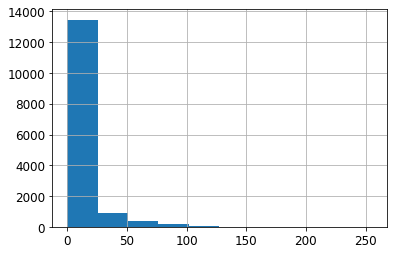

In [218]:
pets["Age"].hist()

Saving figure age_adoption_speed_plot


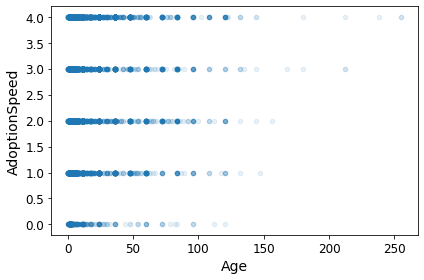

In [219]:
pets.plot(kind="scatter", x="Age", y="AdoptionSpeed", alpha=0.1)
save_fig("age_adoption_speed_plot")

The plot shows us that age has very little relevance to the adoptability of a pet when considered alone.

**Maturity size and adoptability**

<AxesSubplot:>

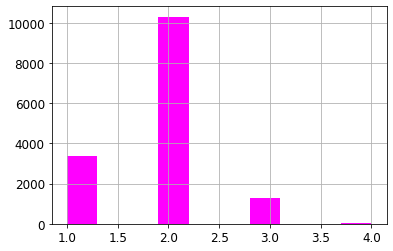

In [95]:
pets = load_pet_data()
pets["MaturitySize"].hist(color = 'magenta')

Saving figure maturitySize_adoption_speed_plot


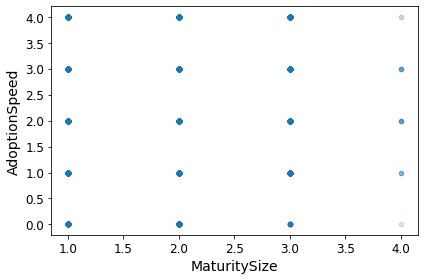

In [96]:
pets.plot(kind="scatter", x="MaturitySize", y="AdoptionSpeed", alpha=0.1)
save_fig("maturitySize_adoption_speed_plot")

The plot shows us that maturity size is not that important when people decide to adopt a pet.

**Cats,Dogs and adoptability**

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64


<AxesSubplot:>

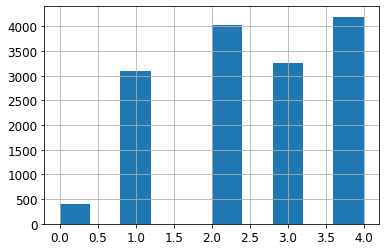

In [97]:
#Adoption speed of all pets : from 0 to 4, 0 being the fastest
pets = load_pet_data()
print(pets['AdoptionSpeed'].value_counts())
pets['AdoptionSpeed'].hist()

In [98]:
# Type 1 (dog)
# Type 2(cat)
pets = load_pet_data()
pets['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

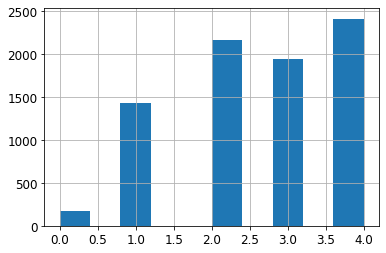

In [99]:
# Adoption speed for dogs
pets = load_pet_data()
pets[pets['Type'] == 1]['AdoptionSpeed'].hist();

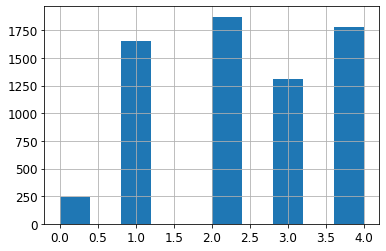

In [100]:
# Adoption speed for cats
pets = load_pet_data()
pets[pets['Type'] == 2]['AdoptionSpeed'].hist();

These histograms show us that even tho almost instant adoption speed of 0 is very rare in both cases, we can see more cats with faster speed adoption than the dogs, however the datas are close enough to see that this bias does not really matter that much.

**Health and adoptability**

In [101]:
#Health values : 1 is healty, 2 is wounded, 3 is severely injured
pets["Health"].value_counts()

1    14478
2      481
3       34
Name: Health, dtype: int64

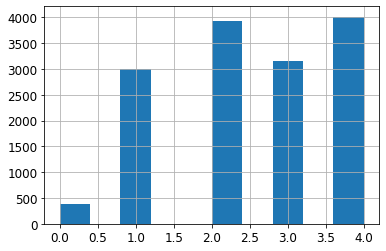

In [102]:
# Adoption speed for the hapthy pets : health level is 1
pets[pets['Health'] == 1]['AdoptionSpeed'].hist();

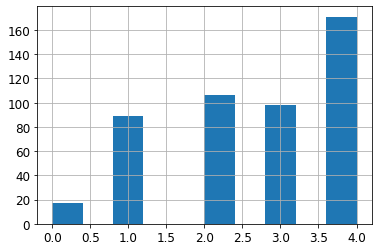

In [103]:
#Adoption speed for a little wounded animals where health level is 2
pets[pets['Health'] == 2]['AdoptionSpeed'].hist();

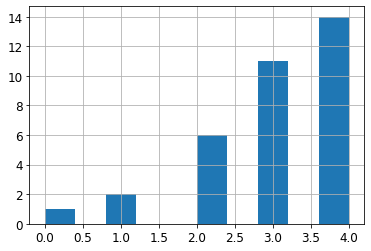

In [104]:
#Adpotion speed for severly injured animals where health level is 3
pets[pets['Health'] == 3]['AdoptionSpeed'].hist();

These datas show that healthy animals are preffered and are adopted the fastest, followed by animals with little wounds and the hardest to adopt are the severly injured animals.

**Photos of the animal and adoptability**

In [105]:
# Photo amount.
pets["PhotoAmt"].value_counts()

1.0     3075
2.0     2518
3.0     2511
5.0     2147
4.0     1881
6.0      621
7.0      432
0.0      341
8.0      314
9.0      231
10.0     190
11.0     184
12.0      97
13.0      86
14.0      78
15.0      50
16.0      39
17.0      27
20.0      25
19.0      20
30.0      19
18.0      18
21.0      16
24.0      15
23.0      12
26.0      10
22.0       9
25.0       8
28.0       7
27.0       6
29.0       6
Name: PhotoAmt, dtype: int64

<AxesSubplot:>

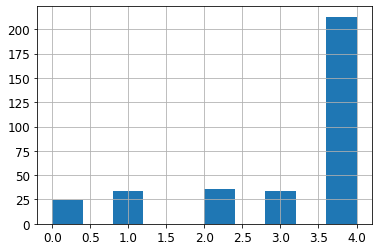

In [106]:
#Adoption speed for pets with no photos(least amount of photos)
pets[pets['PhotoAmt'] == 0]['AdoptionSpeed'].hist()

<AxesSubplot:>

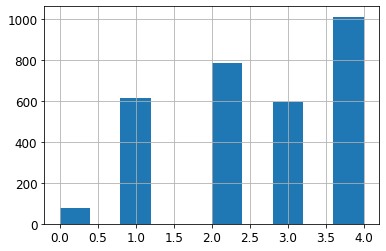

In [107]:
#for 1 photo
pets[pets['PhotoAmt'] == 1]['AdoptionSpeed'].hist()

<AxesSubplot:>

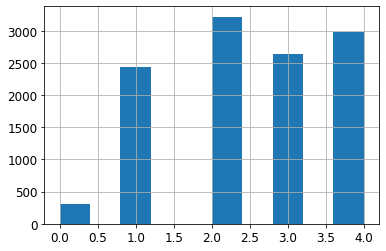

In [108]:
#for more photos 
pets[pets['PhotoAmt'] >= 2]['AdoptionSpeed'].hist()

These datas show that the number of photos avaible really matter when adopting an animal.

# Prepare the Data for Machine Learning Algorithms

In [275]:

pets_train = strat_train_set.drop("AdoptionSpeed", axis=1) # drop labels for training set
pets_labels = strat_train_set["AdoptionSpeed"].copy()

## Data cleaning

In [276]:
sample_incomplete_rows = strat_train_set[strat_train_set.isnull().any(axis=1)].head()
sample_incomplete_rows
 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
12375,2,NaN,40,250,0,2,1,0,0,2,...,1,1,0,41327,43af793154b6f43385ba1b308f77ec0a,0,"i love my cat ,but i feel its time to look for...",bda06474b,3.0,4
12831,1,NaN,2,307,307,2,1,2,5,1,...,1,2,0,41327,87fc4907f5dbd65504b1945a02eeea58,0,"they are adorable , quiet and obedient . i fou...",8d39e0fa1,4.0,0
9903,1,NaN,1,307,0,1,1,2,0,2,...,1,3,0,41326,9bea829f5ed57b412a128e603e339b9c,0,There is a small bushy little forest located n...,99859bab7,1.0,2
5709,2,NaN,12,266,266,1,3,7,0,2,...,1,2,0,41401,bebcc805289059868c5887b29c78713b,0,I have recently found 2 cats and needs a home....,4ac37cc7d,0.0,4
14538,2,NaN,1,299,0,2,1,7,0,2,...,1,1,0,41326,15f499bb4cae5ec09f35139d31f3831a,0,My cat recently gave birth to 3 kittens a mont...,b879a154c,1.0,2


In [277]:
#sample_incomplete_rows.dropna(subset=["Name"]) 

In [278]:
strat_train_set.isna().sum()

Type                0
Name             1005
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description         9
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [279]:
names = []
for name in strat_train_set['Name']:
    if 'name' in str(name).lower():
        names.append(str(name))
   
for name in names:
    print(name)

Not Named
Haven't Name Yet
Newborn *no Name
Mercy (temporary Name)
No Name
No Name
Noname
(no Name)
No Names Yet
No Name Yet
No Name Yet
No Name
No Name
1 Year Kitten Named Mia At Damansara!
New Mom ( Re Nameable )
To Be Named By Owner
No Name Yet
No Name
Unnamed.
The Nameless One
Nikki (temporary Name)
No Name Yet
No Name Yet
Kitten....no Name
No Name
No Name
Not Yet Named
I Think I Name Her Lucky
No Name
Unnamed
No Name Yet
(No Name)
Noname
No Name
Kitten (no Name Yet)
NO NAME
Blackie (Temp Name)
No Names Yet
No Name
No Name
"no Name"
My Name Is Cocobee
No Name For Now
No Name
In The Name Of Development
No Name Yet
No Names
Kuroki (NAME IS UP TO YOU)
NO NAME YET
No Name Yet
Not Yet Named
No Name
No Name
No Named
No Name
No Names Yet
Mocha &Latte (can Be Renamed)
No Name
- To Be Named -
Nameless
No Name
Waiting New Owner To Name Me!
No Name
No Name
* To Be Named *
No Name
No Name Yet
No Name
No Name
$ To Be Named $
Nameless
No Name
*please Name Us*
Noname
Unamed
Unnamed
Stray Cat Name

**Handling text attributes for name**

In [280]:
# Normalizing "nan" and unnamed names and code name(no vowels and too short names) to 0 and valid names to 1.
pets_num = strat_train_set.copy(deep = True) 

codeNames = set()
for name in pets_num['Name']:
    strName = str(name)
    if len(strName) < 3 or ('a' not in strName and 'e' not in strName and 'i' not in strName and 'o' not in strName and 'u' not in strName and 'y' not in strName and
                           'A' not in strName and 'E' not in strName and 'I' not in strName and 'O' not in strName and 'U' not in strName and 'Y' not in strName):
        codeNames.add(strName)
#print("Found " + str(len(names)) + " code names")
pets_num.loc[pets_num['Name'].isin(codeNames), 'Name'] = np.nan

unnamedForms = set(names)
pets_num.loc[pets_num['Name'].isin(unnamedForms), 'Name'] = np.nan


pets_num.loc[pets_num['Name'].notna(), 'Name'] = "asdfghjkl"

pets_num.loc[pets_num['Name'].isna(), 'Name'] = ""

print("Number of not valid names: " + str(len(pets_num[pets_num['Name'] == ""])))

pets_num.Name.replace(["","asdfghjkl"], [0, 1], inplace= True)
#print(pets_num.loc[[71]])


Number of not valid names: 1422


In [281]:
# Dropping RescuerID, petID and description columnns
pets_num.drop(['RescuerID','PetID','Description'],axis = 1,inplace = True)
pets_num.head(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
10070,1,1,2,307,307,1,1,0,0,2,...,2,1,2,1,3,0,41326,0,8.0,2
13397,1,1,12,307,0,2,2,0,0,1,...,1,1,1,1,1,0,41326,0,3.0,3
14656,1,1,2,307,307,1,1,2,7,2,...,2,2,2,1,1,0,41326,0,1.0,4
5596,1,1,2,307,307,1,3,0,0,2,...,1,1,2,1,1,0,41326,0,2.0,1
13463,2,1,4,265,0,3,1,2,0,2,...,2,2,2,1,4,0,41326,0,2.0,2
9818,1,1,12,307,0,2,1,2,4,2,...,1,1,1,1,1,0,41326,0,3.0,2
4307,1,1,24,307,0,1,5,7,0,2,...,3,3,3,1,1,0,41336,0,4.0,3
12375,2,0,40,250,0,2,1,0,0,2,...,3,1,2,1,1,0,41327,0,3.0,4
4313,2,1,4,266,0,2,1,0,0,2,...,3,3,2,1,1,100,41401,0,1.0,3
3972,1,1,8,307,307,1,5,7,0,2,...,3,3,3,1,1,0,41326,0,3.0,4


<AxesSubplot:>

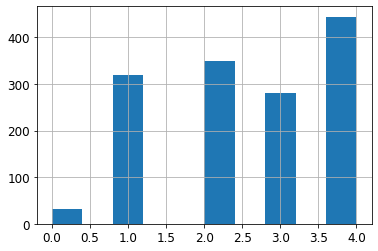

In [282]:
# Adoption speed for unnamed pets
pets_num[pets_num['Name'] == 0]["AdoptionSpeed"].hist()

<AxesSubplot:>

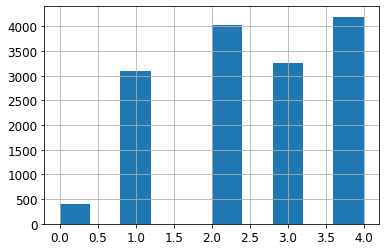

In [283]:
# Adoption speed for named pets
pets[pets['Name'] != 0]["AdoptionSpeed"].hist()

 Unnamed pets tend to be less adopted in comparison with named pets.

## Looking for correlations

In [284]:
pets.corr()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337


In [285]:
corr_matrix = pets.corr()
corr_matrix["AdoptionSpeed"].sort_values(ascending=False)

AdoptionSpeed    1.000000
Breed1           0.107834
Age              0.100510
Quantity         0.062931
Gender           0.057622
MaturitySize     0.045653
Health           0.029382
State            0.013119
VideoAmt        -0.000571
Fee             -0.004017
Color3          -0.007014
Dewormed        -0.013210
Breed2          -0.018642
PhotoAmt        -0.023233
Color2          -0.038579
Color1          -0.044192
Vaccinated      -0.059043
Sterilized      -0.083447
Type            -0.091240
FurLength       -0.091337
Name: AdoptionSpeed, dtype: float64

From the correlation table above, we can observe the fact that the adoption breed is the most closely correlated to the breed of the animal, but still, a correlation of approximately 0.107 is quite small and needs further reassessing and observing of the data.

Saving figure scatter_matrix_plot


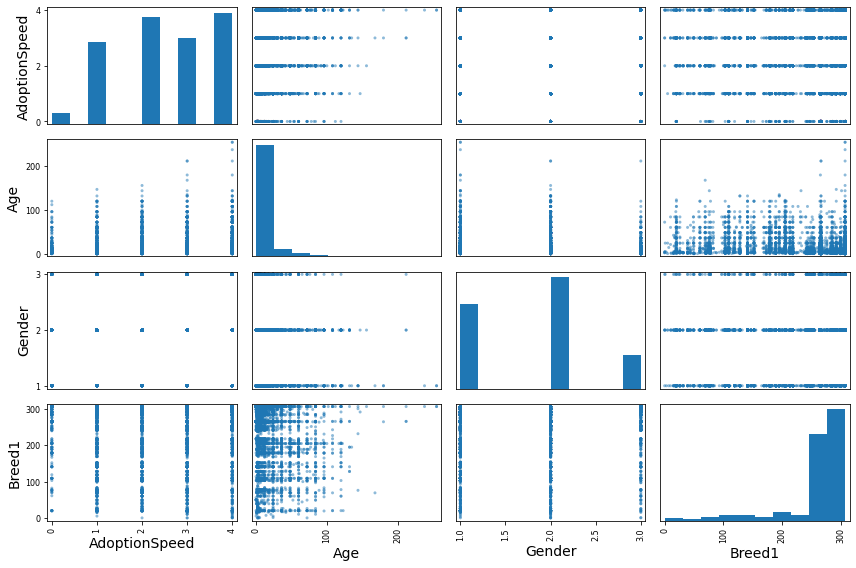

In [286]:
from pandas.plotting import scatter_matrix

attributes = ["AdoptionSpeed", "Age", "Gender",
              "Breed1"]
scatter_matrix(pets[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Analyzing the graphs above, we can observe the fact that age and breed are correlated, as expected, considering the fact that the age an animal can have is dependent on the breed they are. Moreover, we can observe that the first gender of the table, the males, tend to live longer than females in the pet domain. Regarding the gender and breed correlation, we notice that the third gender appears more in the breeds with a higher index than in those with a lower one (the name of the breeds and their identifier can be found in the 'breeds' series). The adoption speed is once again, hard to analyze when considering only one attribute.

## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [331]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
pets_num_labels = pets_num["AdoptionSpeed"].copy() 
pets_num_tr = num_pipeline.fit_transform(pets_num)

In [332]:
pets_num_tr

array([[-0.91382018,  0.36675093, -0.46473571, ..., -0.16537605,
         1.17591178, -0.43861815],
       [-0.91382018,  0.36675093,  0.0807281 , ..., -0.16537605,
        -0.25490893,  0.41085482],
       [-0.91382018,  0.36675093, -0.46473571, ..., -0.16537605,
        -0.82723721,  1.2603278 ],
       ...,
       [-0.91382018,  0.36675093, -0.46473571, ..., -0.16537605,
        -0.54107307, -0.43861815],
       [-0.91382018,  0.36675093, -0.46473571, ..., -0.16537605,
        -0.54107307, -1.28809113],
       [ 1.0943072 ,  0.36675093,  1.06256296, ..., -0.16537605,
        -0.54107307,  0.41085482]])

# Select and train a model

## Training and Evaluating on the Training Set

### Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.

In [334]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(pets_num_tr, pets_num_labels)

LinearRegression()

In [335]:
# let's try the full preprocessing pipeline on a few training instances
some_data = pets_num.iloc[:5]
some_labels = pets_num_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels: ",list(some_labels))

Predictions: [2. 3. 4. 1. 2.]
Labels:  [2, 3, 4, 1, 2]


In [336]:
some_data_prepared

array([[-0.91382018,  0.36675093, -0.46473571,  0.6960601 ,  1.8863147 ,
        -1.13814038, -0.70766931, -1.17032209, -0.62664444,  0.25434064,
         0.88643383,  0.395021  , -0.80010356,  0.15062915, -0.18244511,
         0.93559467, -0.26823035, -0.61481837, -0.16537605,  1.17591178,
        -0.43861815],
       [-0.91382018,  0.36675093,  0.0807281 ,  0.6960601 , -0.60542833,
         0.32591536, -0.13648588, -1.17032209, -0.62664444, -1.58003194,
        -0.78236029, -1.09910763, -0.80010356, -1.6102344 , -0.18244511,
        -0.39019957, -0.26823035, -0.61481837, -0.16537605, -0.25490893,
         0.41085482],
       [-0.91382018,  0.36675093, -0.46473571,  0.6960601 ,  1.8863147 ,
        -1.13814038, -0.70766931, -0.44185444,  1.72409117,  0.25434064,
        -0.78236029,  0.395021  ,  0.63348505,  0.15062915, -0.18244511,
        -0.39019957, -0.26823035, -0.61481837, -0.16537605, -0.82723721,
         1.2603278 ],
       [-0.91382018,  0.36675093, -0.46473571,  0.6960601 

In [337]:
from sklearn.metrics import mean_squared_error

pets_predictions = lin_reg.predict(pets_num_tr)
lin_mse = mean_squared_error(pets_num_labels, pets_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.6428468035318131e-15

In [338]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(pets_num_labels, pets_predictions)
lin_mae

1.2195051075726685e-15

The model has found an error of 1.64e-15  for RMSE and and error of 1.21e-15 for MAE which is atomically small so we are very pleased to see that.

## Better Evaluation using Cross Validation

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

In [294]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, pets_num_tr, pets_num_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [295]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [2.95486923e-15 2.21177865e-15 1.75683220e-15 2.06764943e-15
 2.12574760e-15 1.17861866e-15 1.31501021e-15 1.34936529e-15
 1.50738533e-15 3.52085681e-15]
Mean: 1.998811340922983e-15
Standard deviation: 7.18262436128636e-16


In [296]:
scores = cross_val_score(lin_reg, pets_num_tr, pets_num_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     1.998811e-15
std      7.571151e-16
min      1.178619e-15
25%      1.388870e-15
50%      1.912241e-15
75%      2.190271e-15
max      3.520857e-15
dtype: float64

In [297]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(pets_num_tr, pets_num_labels)
pets_predictions = svm_reg.predict(pets_num_tr)
svm_mse = mean_squared_error(pets_num_labels, pets_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.06425240813435007

### Linear Regression on Test Set

In [298]:
# Normalizing "nan" and unnamed names and code name(no vowels and too short names) to 0 and valid names to 1.
pets_num_test = strat_test_set.copy(deep = True) 

codeNames = set()
for name in pets_num_test['Name']:
    strName = str(name)
    if len(strName) < 3 or ('a' not in strName and 'e' not in strName and 'i' not in strName and 'o' not in strName and 'u' not in strName and 'y' not in strName and
                           'A' not in strName and 'E' not in strName and 'I' not in strName and 'O' not in strName and 'U' not in strName and 'Y' not in strName):
        codeNames.add(strName)
#print("Found " + str(len(names)) + " code names")
pets_num_test.loc[pets_num_test['Name'].isin(codeNames), 'Name'] = np.nan

unnamedForms = set(names)
pets_num_test.loc[pets_num_test['Name'].isin(unnamedForms), 'Name'] = np.nan


pets_num_test.loc[pets_num_test['Name'].notna(), 'Name'] = "asdfghjkl"

pets_num_test.loc[pets_num_test['Name'].isna(), 'Name'] = ""

print("number of not valid names: " + str(len(pets_num_test[pets_num_test['Name'] == ""])))

pets_num_test.Name.replace(["","asdfghjkl"], [0, 1], inplace= True)
#print(pets_num_test.loc[[71]])


number of not valid names: 330


In [299]:
# Dropping RescuerID, petID and description columnns
pets_num_test.drop(['RescuerID','PetID','Description'],axis = 1,inplace = True)
pets_num_test.head(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
14696,1,1,1,307,307,2,1,0,0,2,...,2,2,2,1,2,0,41327,0,9.0,4
14823,1,1,24,103,307,2,1,2,4,2,...,1,1,2,1,1,0,41330,0,2.0,4
2838,1,1,2,307,0,2,2,7,0,2,...,1,1,2,1,5,0,41326,0,5.0,4
1848,2,1,1,265,0,1,2,0,0,1,...,1,1,2,1,1,0,41401,2,6.0,2
669,2,1,9,266,266,2,2,4,6,2,...,2,2,2,1,2,0,41326,0,8.0,4
11695,1,1,2,307,0,3,2,0,0,2,...,2,2,2,1,2,0,41336,0,5.0,4
2337,2,1,12,265,0,2,2,3,0,1,...,1,1,1,2,1,0,41326,0,1.0,1
607,1,1,1,307,0,2,2,0,0,2,...,2,2,2,1,2,0,41332,0,1.0,2
11776,2,1,12,266,0,1,1,7,0,3,...,1,1,1,1,1,0,41401,0,2.0,1
13064,2,1,9,243,0,1,4,7,0,1,...,2,2,2,1,1,0,41326,0,3.0,4


In [300]:
pets_labels_test = strat_test_set["AdoptionSpeed"].copy()
pets_values_test = num_pipeline.fit_transform(pets_num_test)

In [301]:
from sklearn.linear_model import LinearRegression

lin_reg_test = LinearRegression()
lin_reg_test.fit(pets_values_test,pets_labels_test)

LinearRegression()

In [302]:
# let's try the full preprocessing pipeline on a few training instances
some_data = pets_num_test.iloc[:5]
some_labels = pets_labels_test.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels: ",list(some_labels))

Predictions: [3.99934512 3.99934512 3.99934512 1.99955742 3.99934512]
Labels:  [4, 4, 4, 2, 4]


In [303]:
some_data_prepared

array([[-0.93758876,  0.35162738, -0.52690707,  0.68987708,  1.9260539 ,
         0.33854866, -0.70540272, -1.19477428, -0.64698194,  0.24219188,
         0.89898887,  0.43355294,  0.63714479,  0.15506327, -0.18778486,
         0.36002838, -0.28482618, -0.59680735, -0.15850524,  1.47876699,
         1.25977149],
       [-0.93758876,  0.35162738,  0.79317388, -2.71400242,  1.9260539 ,
         0.33854866, -0.70540272, -0.46217807,  0.68290074,  0.24219188,
        -0.77247277, -1.08009696, -0.81482878,  0.15506327, -0.18778486,
        -0.39927198, -0.28482618, -0.50494763, -0.15850524, -0.54415464,
         1.25977149],
       [-0.93758876,  0.35162738, -0.46951224,  0.68987708, -0.5866589 ,
         0.33854866, -0.1248586 ,  1.36931245, -0.64698194,  0.24219188,
        -0.77247277, -1.08009696, -0.81482878,  0.15506327, -0.18778486,
         2.63792948, -0.28482618, -0.62742725, -0.15850524,  0.32281177,
         1.25977149],
       [ 1.06656569,  0.35162738, -0.52690707, -0.01092164

In [304]:
from sklearn.metrics import mean_squared_error

pets_predictions_test = lin_reg.predict(pets_values_test)
lin_mse = mean_squared_error(pets_labels_test, pets_predictions_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0005129007409090651

In [305]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(pets_labels_test, pets_predictions_test)
lin_mae

0.0004974422300625505

The model has found an error of 0.0005  for RMSE and and error of 0.0004 for MAE which means that we trained our model very well.

Moving into more complex models

### Decision Tree Regression 

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. 

In [378]:
#defining a new pipeline for the new regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
pets_num_labels_dt = pets_num["AdoptionSpeed"].copy() 
pets_num_tr_dt = num_pipeline.fit_transform(pets_num)

In [340]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(pets_num_tr_dt, pets_num_labels_dt)

DecisionTreeRegressor(random_state=42)

In [342]:
pets_predictions = tree_reg.predict(pets_num_tr_dt)
tree_mse = mean_squared_error(pets_num_labels_dt, pets_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [343]:
from sklearn.metrics import mean_absolute_error

tree_mae = mean_absolute_error(pets_num_labels_dt, pets_predictions)
tree_mae

0.0

We got 0 so it means that it's perfect. We're doing incredible!!

In [345]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(tree_reg, pets_num_tr_dt, pets_num_labels_dt,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores2)

In [346]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean: 0.0
Standard deviation: 0.0


### Random Forest Regression

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [348]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
pets_num_labels_rf = pets_num["AdoptionSpeed"].copy() 
pets_num_tr_rf = num_pipeline.fit_transform(pets_num)

In [349]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(pets_num_tr_rf,pets_num_labels_rf)

RandomForestRegressor(random_state=42)

In [351]:
pets_predictions_rf = forest_reg.predict(pets_num_tr_rf)
forest_mse = mean_squared_error(pets_num_labels_rf, pets_predictions_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [352]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg,pets_num_tr_rf, pets_num_labels_rf,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean: 0.0
Standard deviation: 0.0


## Fine tune your model

### Grid search

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. 

In [358]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(pets_num_tr, pets_num_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [359]:
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [362]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022116,0.004204,0.002212,3.946142e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.267612,-0.336112,...,-0.254994,0.070965,18,-0.084442,-0.093521,-0.049204,-0.057750,-0.095989,-0.076181,0.019125
1,0.055588,0.002496,0.005060,1.638750e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.174831,-0.141034,...,-0.158243,0.012414,16,-0.039546,-0.032387,-0.037082,-0.032822,-0.038119,-0.035991,0.002877
2,0.177907,0.011288,0.015501,2.485758e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.128790,-0.142419,...,-0.138120,0.004957,14,-0.022511,-0.023496,-0.024880,-0.023526,-0.023836,-0.023650,0.000760
3,0.021735,0.001045,0.002283,3.781858e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.083739,-0.186652,...,-0.096368,0.049401,13,-0.026159,-0.056499,-0.032320,-0.019871,-0.016315,-0.030233,0.014226
4,0.066385,0.015905,0.003987,6.292497e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.034631,-0.041388,...,-0.033665,0.008241,9,-0.009488,-0.010050,-0.010935,-0.007087,-0.006157,-0.008743,0.001817
5,0.188876,0.017894,0.011964,2.112253e-03,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.026991,-0.032839,...,-0.026227,0.004029,7,-0.005567,-0.005909,-0.005347,-0.004286,-0.004400,-0.005102,0.000646
6,0.018316,0.000805,0.001594,4.881135e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.011810,-0.019730,...,-0.018232,0.005501,6,-0.004273,-0.005778,-0.004840,-0.006288,-0.008464,-0.005929,0.001450
7,0.053866,0.004484,0.003505,6.658789e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.008850,-0.010546,...,-0.010902,0.001924,5,-0.002787,-0.002817,-0.002990,-0.003685,-0.003640,-0.003184,0.000397
8,0.178133,0.015577,0.009377,1.675590e-03,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.006432,-0.005979,...,-0.006147,0.000240,3,-0.001513,-0.001195,-0.001363,-0.001422,-0.001503,-0.001399,0.000116
9,0.023863,0.001395,0.002088,5.093748e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.007642,-0.014821,...,-0.007726,0.004125,4,-0.002710,-0.005199,-0.002316,-0.001876,-0.000996,-0.002619,0.001410


### Randomized Search

Random search is a method in which random combinations of hyperparameters are selected and used to train a model. The best random hyperparameter combinations are used. 

In [363]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(pets_num_tr, pets_num_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E9822737F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E9822720B0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [364]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.04395935247425862 {'max_features': 7, 'n_estimators': 180}
0.13125147237638135 {'max_features': 5, 'n_estimators': 15}
0.22110157532293195 {'max_features': 3, 'n_estimators': 72}
0.12640070263798947 {'max_features': 5, 'n_estimators': 21}
0.04466416473802224 {'max_features': 7, 'n_estimators': 122}
0.22274371669156917 {'max_features': 3, 'n_estimators': 75}
0.22328316135880322 {'max_features': 3, 'n_estimators': 88}
0.10147405573828534 {'max_features': 5, 'n_estimators': 100}
0.21886376855304643 {'max_features': 3, 'n_estimators': 150}
0.31657014963228547 {'max_features': 5, 'n_estimators': 2}


## Analyze the best models and their errors

In [366]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.47950144e-04, 3.29593124e-04, 1.75930581e-02, 1.24818803e-02,
       1.34552478e-03, 1.17219715e-03, 1.08293206e-03, 8.53604649e-04,
       3.85064175e-04, 1.66272929e-03, 1.79977105e-03, 1.32626915e-03,
       5.99342916e-04, 9.69584016e-03, 2.72597672e-04, 2.52477356e-03,
       8.90023605e-04, 1.20011894e-03, 2.64785220e-04, 3.97065185e-03,
       9.39601292e-01])

## Evaluate your system on the test set

In [374]:
from sklearn.pipeline import Pipeline
final_model = grid_search.best_estimator_

X_test = pets_num_test
y_test  = strat_test_set["AdoptionSpeed"].copy()

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

0.03868843791159029

In [375]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.03508578, 0.04198307])

We could compute the interval manually like this:

In [379]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.035085784567137984, 0.041983070128163984)

Alternatively, we could use a z-scores rather than t-scores:

In [380]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.0350873136748899, 0.04198179218611131)

Since our adoption speed ranges from 0 to 4, we can say that the errors above, mostly of values around 0.3 and 0.4 are small and satisfiable.

## Conclusions

When using linear regression, our model obtained extremelly small errors, which gives us hope in terms of calculating a valid adoption speed for our fluffy friends. When using decision tree and random forest regression, our RMSE and MAE values were 0, which we believe is due to the fact that the actual errors are too small to be represented in our format. Therefore, we are satisfied with the results so far. 